In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif

# Preprocessing

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  w

In [47]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## Eksplorasi

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22804\2467601596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")


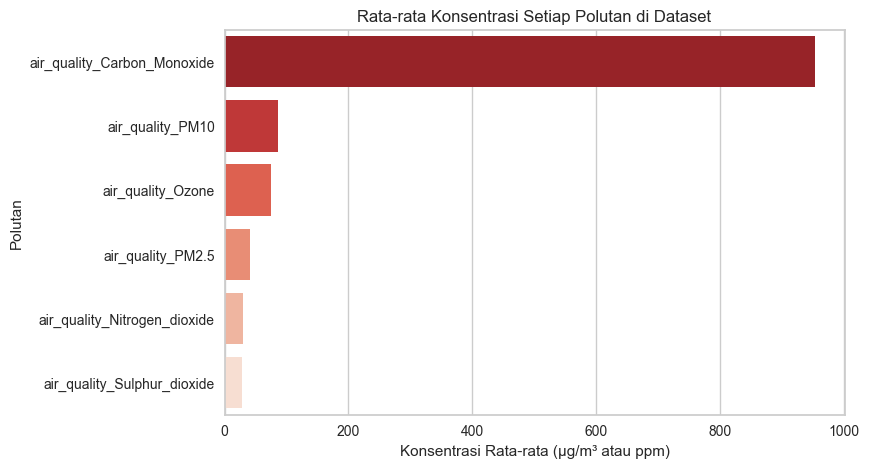

In [48]:
pollutant_means = df[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")
plt.xlabel("Konsentrasi Rata-rata (µg/m³ atau ppm)")
plt.ylabel("Polutan")
plt.title("Rata-rata Konsentrasi Setiap Polutan di Dataset")
plt.show()

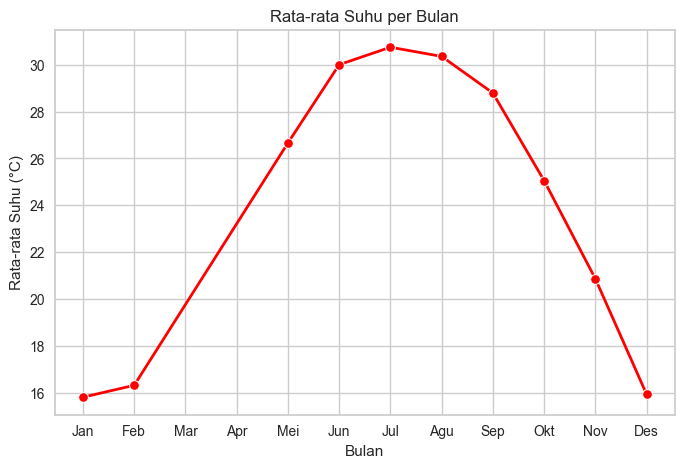

In [49]:
df["last_updated"] = pd.to_datetime(df["last_updated"])
df["month"] = df["last_updated"].dt.month
monthly_avg_temp = df.groupby("month")["temperature_celsius"].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, marker="o", color="red", linewidth=2)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Rata-rata Suhu per Bulan")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.grid(True)
plt.show()


In [50]:
columns_to_drop = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree', ]
df.drop(columns=columns_to_drop, inplace=True)
df.head(5)

,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,month
0,26.6,79.8,8.3,13.3,1012.0,29.89,0.00,0.00,24,30,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,5
1,19.0,66.2,4.3,6.8,1017.0,30.03,0.13,0.01,40,25,...,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1,5
2,17.0,62.6,4.3,6.8,1020.0,30.12,0.00,0.00,68,50,...,7.4,227.0,81.5,7.1,1.8,1.9,2.2,1,1,5
3,36.0,96.8,13.6,22.0,1007.0,29.74,0.00,0.00,33,0,...,29.2,397.2,100.1,18.5,9.7,39.0,114.3,2,4,5
4,38.4,101.2,4.3,6.8,1006.0,29.71,0.00,0.00,31,30,...,7.9,520.7,188.8,8.7,4.7,49.7,57.0,3,6,5


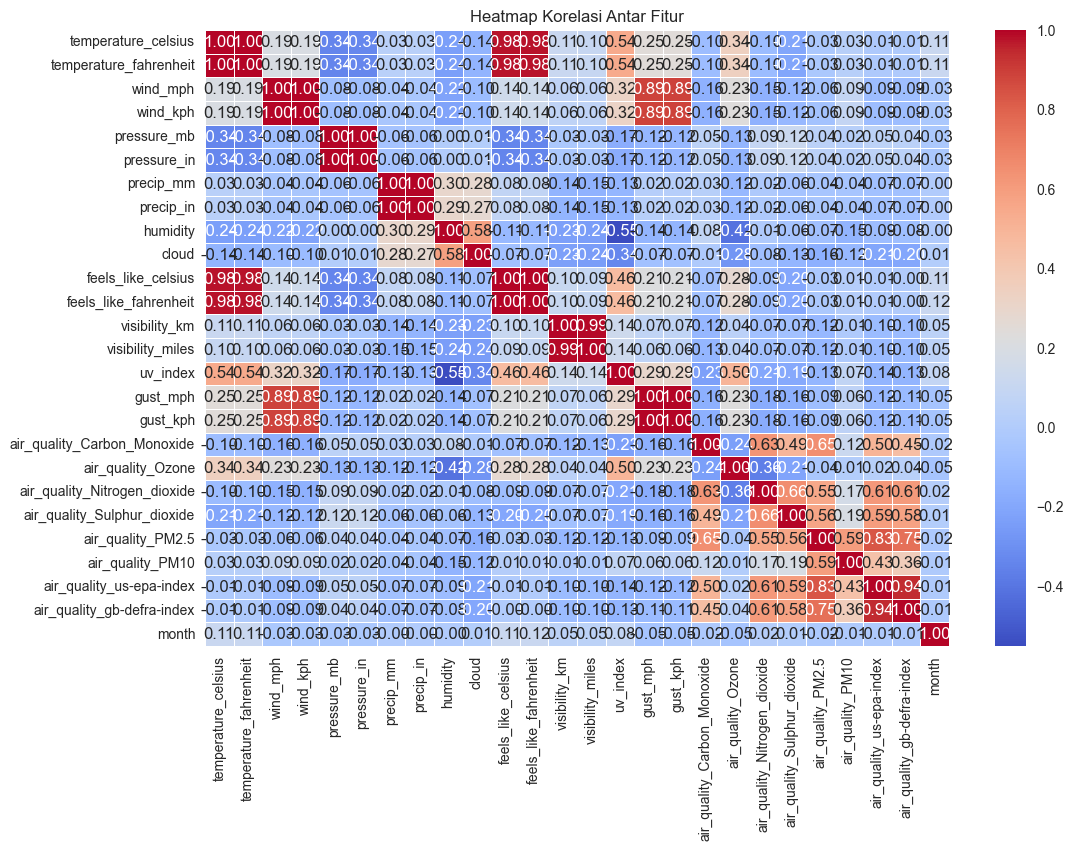

In [51]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [52]:
column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'gust_kph', 'precip_mm', 'air_quality_us-epa-index']
df.drop(columns=column_multikolinearitas, inplace=True)
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,month
0,26.6,13.3,1012.0,24,30,10.0,7.0,277.0,103.0,1.1,0.2,8.4,26.6,5
1,19.0,6.8,1017.0,40,25,10.0,4.0,186.9,103.0,1.0,0.3,0.8,0.9,5
2,17.0,6.8,1020.0,68,50,10.0,5.0,227.0,81.5,7.1,1.8,1.9,2.2,5
3,36.0,22.0,1007.0,33,0,10.0,8.0,397.2,100.1,18.5,9.7,39.0,114.3,5
4,38.4,6.8,1006.0,31,30,10.0,9.0,520.7,188.8,8.7,4.7,49.7,57.0,5


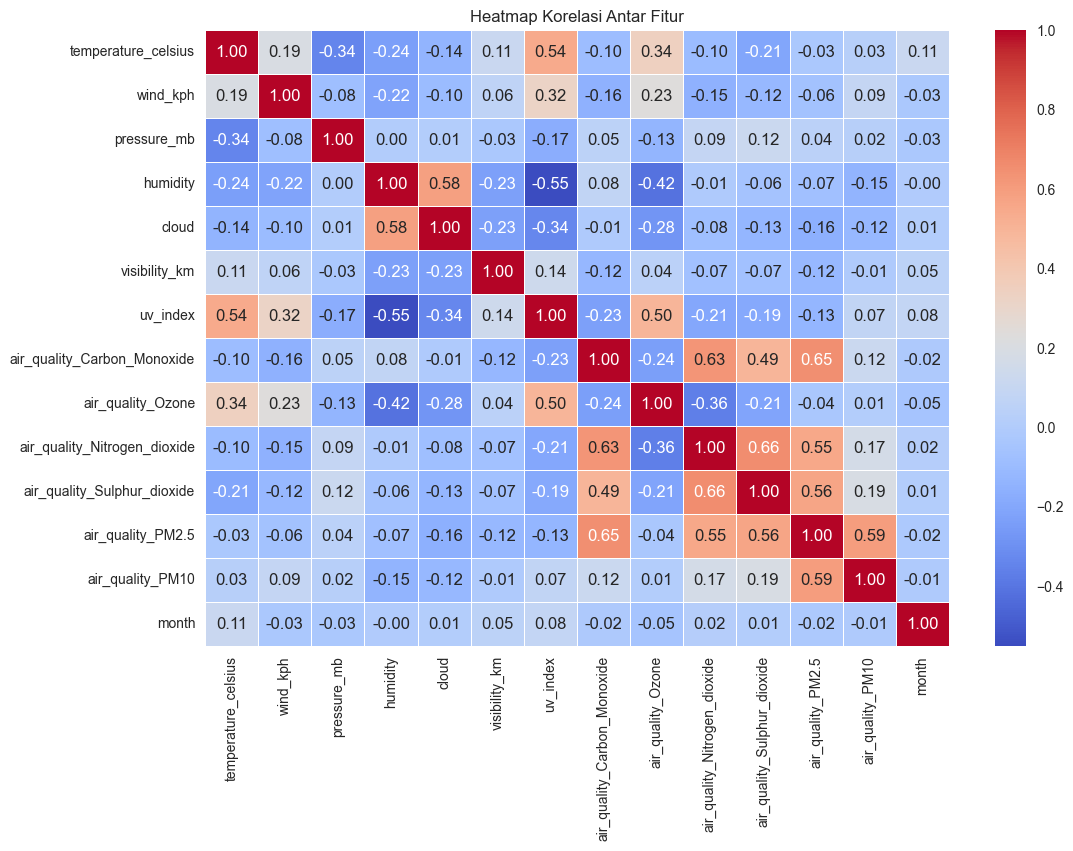

In [53]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Feature Engineering

In [54]:
df['pm_ratio'] = df['air_quality_PM2.5'] / (df['air_quality_PM10'] + 1e-5)

In [55]:
def categorize_wind(speed):
    if speed < 5:
        return "Low"
    elif 5 <= speed <= 15:
        return "Medium"
    else:
        return "High"

df['wind_condition'] = df['wind_kph'].apply(categorize_wind)

In [56]:
df['humidity_temperature_ratio'] = df['humidity'] / (df['temperature_celsius'] + 1e-5)

In [57]:
df['dew_point'] = df['temperature_celsius'] - ((100 - df['humidity']) / 5)

In [58]:
pollutant_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                  'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 
                  'air_quality_PM2.5', 'air_quality_PM10']

df['total_pollution'] = df[pollutant_cols].sum(axis=1)

In [59]:
df['pollution_level'] = pd.qcut(df['total_pollution'], q=3, labels=['Low', 'Medium', 'High']).astype(str)

In [60]:
df.head()

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,month,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point,total_pollution,pollution_level
0,26.6,13.3,1012.0,24,30,10.0,7.0,277.0,103.0,1.1,0.2,8.4,26.6,5,0.315789,Medium,0.902255,11.4,416.3,Low
1,19.0,6.8,1017.0,40,25,10.0,4.0,186.9,103.0,1.0,0.3,0.8,0.9,5,0.888879,Medium,2.105262,7.0,292.9,Low
2,17.0,6.8,1020.0,68,50,10.0,5.0,227.0,81.5,7.1,1.8,1.9,2.2,5,0.863632,Medium,3.999998,10.6,321.5,Low
3,36.0,22.0,1007.0,33,0,10.0,8.0,397.2,100.1,18.5,9.7,39.0,114.3,5,0.341207,High,0.916666,22.6,678.8,Medium
4,38.4,6.8,1006.0,31,30,10.0,9.0,520.7,188.8,8.7,4.7,49.7,57.0,5,0.871930,Medium,0.807291,24.6,829.6,Medium


In [61]:
column = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'pm_ratio', 'wind_condition', 'humidity_temperature_ratio', 'dew_point']
df = df[column]

In [62]:
df = df[df['air_quality_PM10'] >= 0]

## Standardilisasi & Label Encoder

In [63]:
numeric_features = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13649 entries, 0 to 13649
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   air_quality_Carbon_Monoxide   13649 non-null  float64
 1   air_quality_Ozone             13649 non-null  float64
 2   air_quality_Sulphur_dioxide   13649 non-null  float64
 3   air_quality_Nitrogen_dioxide  13649 non-null  float64
 4   air_quality_PM2.5             13649 non-null  float64
 5   air_quality_PM10              13649 non-null  float64
 6   pm_ratio                      13649 non-null  float64
 7   wind_condition                13649 non-null  object 
 8   humidity_temperature_ratio    13649 non-null  float64
 9   dew_point                     13649 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [65]:
category_features = df.select_dtypes(include='object').columns
categories = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=categories)
df[category_features] = encoder.fit_transform(df[category_features])

In [66]:
df.head(5)

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,1.0,-0.021714,-0.308507
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,1.0,-0.021706,-0.714013
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,1.0,-0.021694,-0.382235
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,2.0,-0.021714,0.723690
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,1.0,-0.021715,0.908011


# Modeling

## K-Means

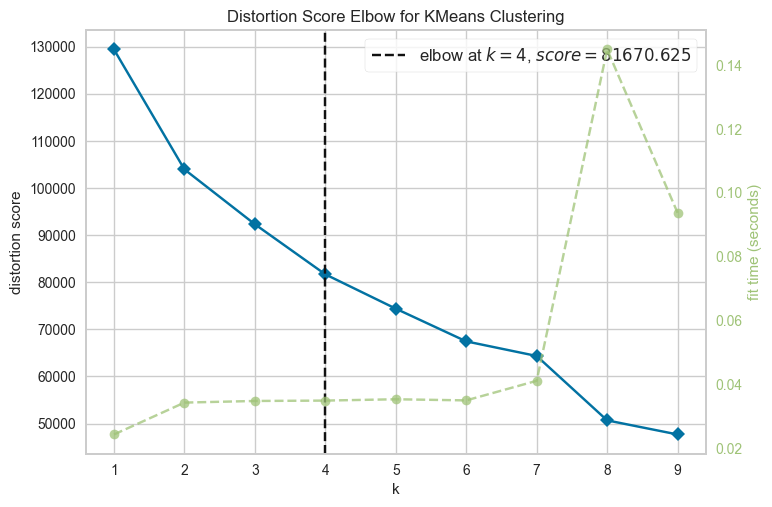

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [68]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

In [69]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("n_clusters={0}, silhouette score {1}".format(num_clusters, silhouette_avg))

n_clusters=2, silhouette score 0.4049724178888042
n_clusters=3, silhouette score 0.21919655298859714
n_clusters=4, silhouette score 0.19263429740568602
n_clusters=5, silhouette score 0.1988973445665268
n_clusters=6, silhouette score 0.20432176440373925
n_clusters=7, silhouette score 0.160379952666889
n_clusters=8, silhouette score 0.2056794811872248


In [70]:
def analyze_clusters(X, labels, k, feature_names):
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_values = cluster_data.mean(axis=0)

        print(f'--- Cluster {cluster_id + 1} ---')
        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters(df, labels_kmeans, k, numeric_features)

Analisis Karakteristik Setiap Cluster:

--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.24
air_quality_Ozone: 0.12
air_quality_Sulphur_dioxide: -0.31
air_quality_Nitrogen_dioxide: -0.33
air_quality_PM2.5: -0.27
air_quality_PM10: -0.12
pm_ratio: -0.10
humidity_temperature_ratio: 1.19
dew_point: -0.02


--- Cluster 2 ---
air_quality_Carbon_Monoxide: 1.15
air_quality_Ozone: -0.59
air_quality_Sulphur_dioxide: 1.51
air_quality_Nitrogen_dioxide: 1.60
air_quality_PM2.5: 1.33
air_quality_PM10: 0.60
pm_ratio: 0.49
humidity_temperature_ratio: 0.96
dew_point: 0.11




In [71]:
sil_score = silhouette_score(df, labels_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.40


In [72]:
dbi = davies_bouldin_score(df, labels_kmeans)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")


Davies-Bouldin Index (K-Means): 1.52


In [73]:
ch_index = calinski_harabasz_score(df, labels_kmeans)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")


Calinski-Harabasz Index (K-Means): 3340.30


## DBSCAN

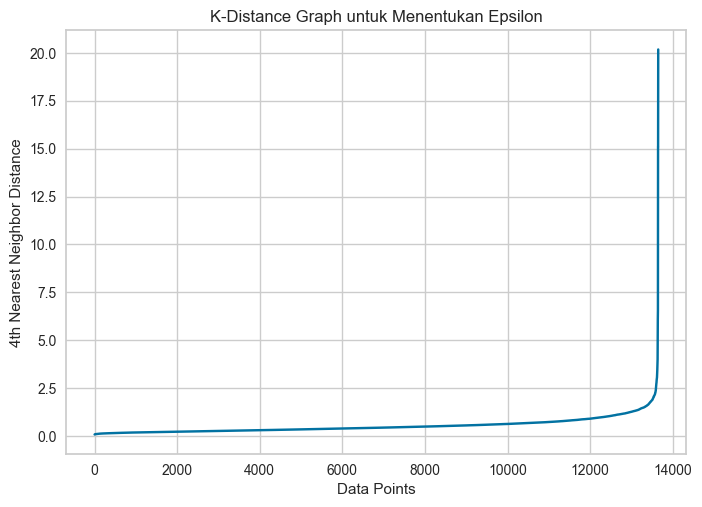

In [74]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()

In [75]:
db = DBSCAN(eps=2.4, min_samples=12)
db.fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_dbscan = db.labels_

['y', 'b', 'g', 'r']


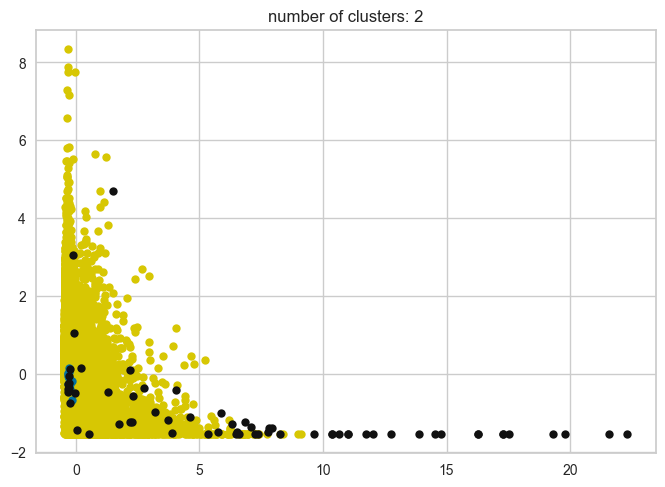

In [76]:
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
unique_labels = set(labels_dbscan)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels_dbscan == k)
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [77]:
def analyze_clusters_dbscan(X, labels, feature_names):
    unique_clusters = set(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        if cluster_id == -1:
            print('--- Cluster Noise (Outlier) ---')
        else:
            print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_dbscan(df, labels_dbscan, numeric_features)


Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.03
air_quality_Ozone: 0.00
air_quality_Sulphur_dioxide: -0.02
air_quality_Nitrogen_dioxide: -0.02
air_quality_PM2.5: -0.03
air_quality_PM10: -0.03
pm_ratio: 0.00
humidity_temperature_ratio: 1.15
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.27
air_quality_Ozone: -0.14
air_quality_Sulphur_dioxide: 0.71
air_quality_Nitrogen_dioxide: 0.26
air_quality_PM2.5: 8.10
air_quality_PM10: 18.72
pm_ratio: -2.36
humidity_temperature_ratio: 2.00
dew_point: -0.02


--- Cluster Noise (Outlier) ---
air_quality_Carbon_Monoxide: 7.10
air_quality_Ozone: -0.96
air_quality_Sulphur_dioxide: 3.35
air_quality_Nitrogen_dioxide: 3.49
air_quality_PM2.5: 5.76
air_quality_PM10: 2.47
pm_ratio: 0.37
humidity_temperature_ratio: 0.83
dew_point: 4.68




In [78]:
sil_score = silhouette_score(df, labels_dbscan)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.80


In [79]:
dbi = davies_bouldin_score(df, labels_dbscan)
print(f"Davies-Bouldin Index (DBSCAN): {dbi:.2f}")

Davies-Bouldin Index (DBSCAN): 1.15


In [80]:
ch_index = calinski_harabasz_score(df, labels_dbscan)
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index:.2f}")

Calinski-Harabasz Index (DBSCAN): 809.40


## Hierarchial

In [81]:
# plt.figure(figsize=(12, 6))
# linkage_matrix = linkage(df, method='ward')
# dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
# plt.title("Dendrogram untuk Hierarchical Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Jarak")
# plt.show()

In [82]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )
agg_clustering.fit(df)
labels_hieararchial = agg_clustering.labels_

In [83]:
def analyze_clusters_hierarchical(X, labels, feature_names):
    unique_clusters = np.unique(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_hierarchical(df.values, labels_hieararchial, numeric_features)

Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.13
air_quality_Ozone: 0.04
air_quality_Sulphur_dioxide: -0.10
air_quality_Nitrogen_dioxide: -0.13
air_quality_PM2.5: -0.12
air_quality_PM10: -0.07
pm_ratio: -0.02
humidity_temperature_ratio: 1.16
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: 3.21
air_quality_Ozone: -1.02
air_quality_Sulphur_dioxide: 2.34
air_quality_Nitrogen_dioxide: 2.99
air_quality_PM2.5: 2.21
air_quality_PM10: 0.42
pm_ratio: 0.58
humidity_temperature_ratio: 0.91
dew_point: 0.01


--- Cluster 2 ---
air_quality_Carbon_Monoxide: 0.24
air_quality_Ozone: -0.53
air_quality_Sulphur_dioxide: 0.97
air_quality_Nitrogen_dioxide: 0.54
air_quality_PM2.5: -0.06
air_quality_PM10: -0.16
pm_ratio: 0.82
humidity_temperature_ratio: 0.33
dew_point: 46.54


--- Cluster 3 ---
air_quality_Carbon_Monoxide: -0.23
air_quality_Ozone: -0.30
air_quality_Sulphur_dioxide: 0.79
air_quality_Nitrogen_dioxide: 0.55
air_quality_PM2.5: 5.70
air

In [84]:
sil_score = silhouette_score(df, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5436


In [85]:
dbi = davies_bouldin_score(df, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.74


In [86]:
ch_index = calinski_harabasz_score(df, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 2264.46
